<a href="https://colab.research.google.com/github/anargh-t/Bank-Loan-Prediction-using-SVM/blob/main/Project_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank loan Prediction

In [ ]:
#import librarys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Processing

In [ ]:
loan_dataset = pd.read_csv("C:/Users/anarg/Desktop/Project word/loan.csv")

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Droping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Label encoding

loan_dataset.replace({"Loan_Status": {'N':0, 'Y':1}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#Dependent Columns values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
#Replace the values 3+ to 4

loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [ ]:
loan_dataset['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [ ]:
loan_dataset['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [ ]:
loan_dataset['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [ ]:
loan_dataset['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [ ]:
#Property area values

loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

# Data Visualization

Loan Status Visual

1    332
0    148
Name: Loan_Status, dtype: int64

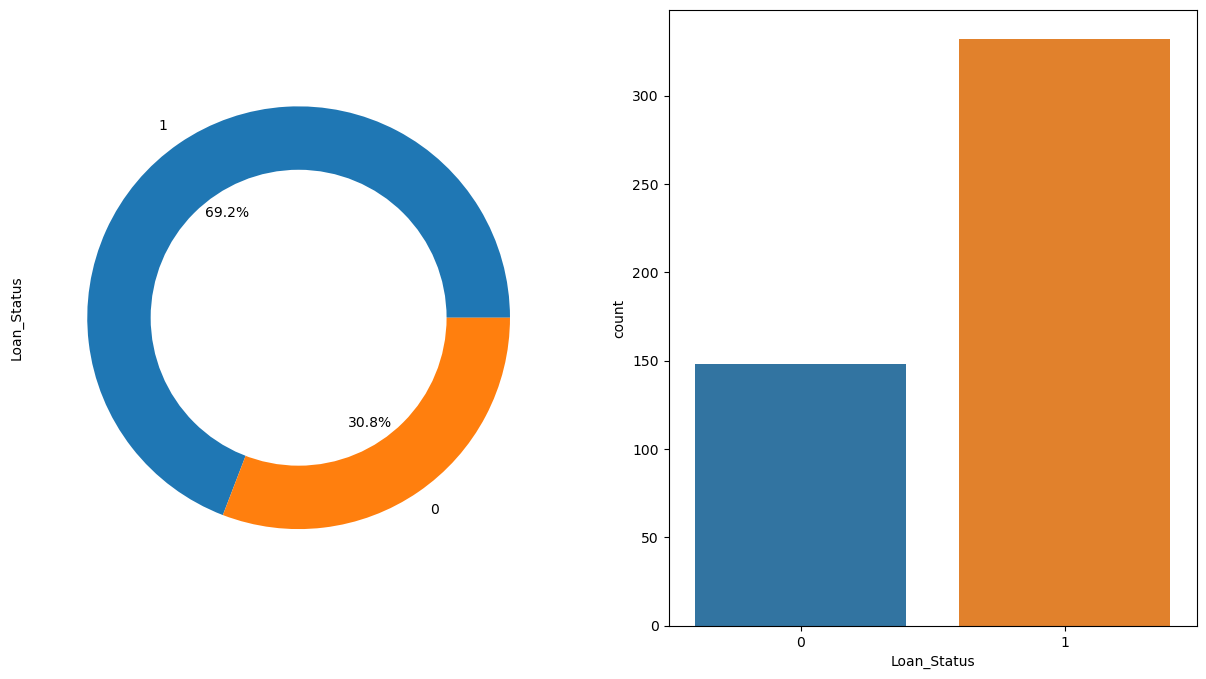

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Loan_Status',data=loan_dataset)
loan_dataset['Loan_Status'].value_counts()

Dataset is highly imbalanced as label class do not have eqaul count of categories.

In [ ]:
# Education vs Loan staus

<AxesSubplot:xlabel='Education', ylabel='count'>

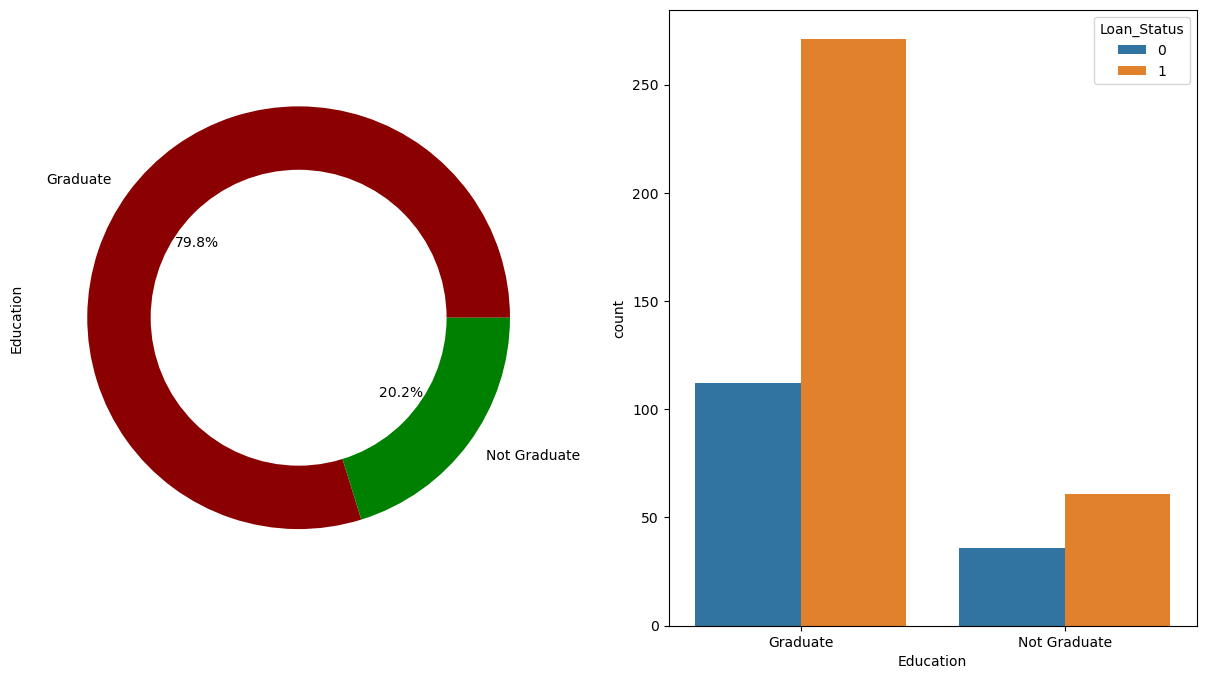

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
colors = ['darkred', 'green', '#99ff99', '#ffcc99']
loan_dataset['Education'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()


fig.gca().add_artist(centre)
plt.subplot(1,2,2)

sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

There are more no. of graduate applicants than than the non graduates one.

<AxesSubplot:xlabel='Education', ylabel='count'>

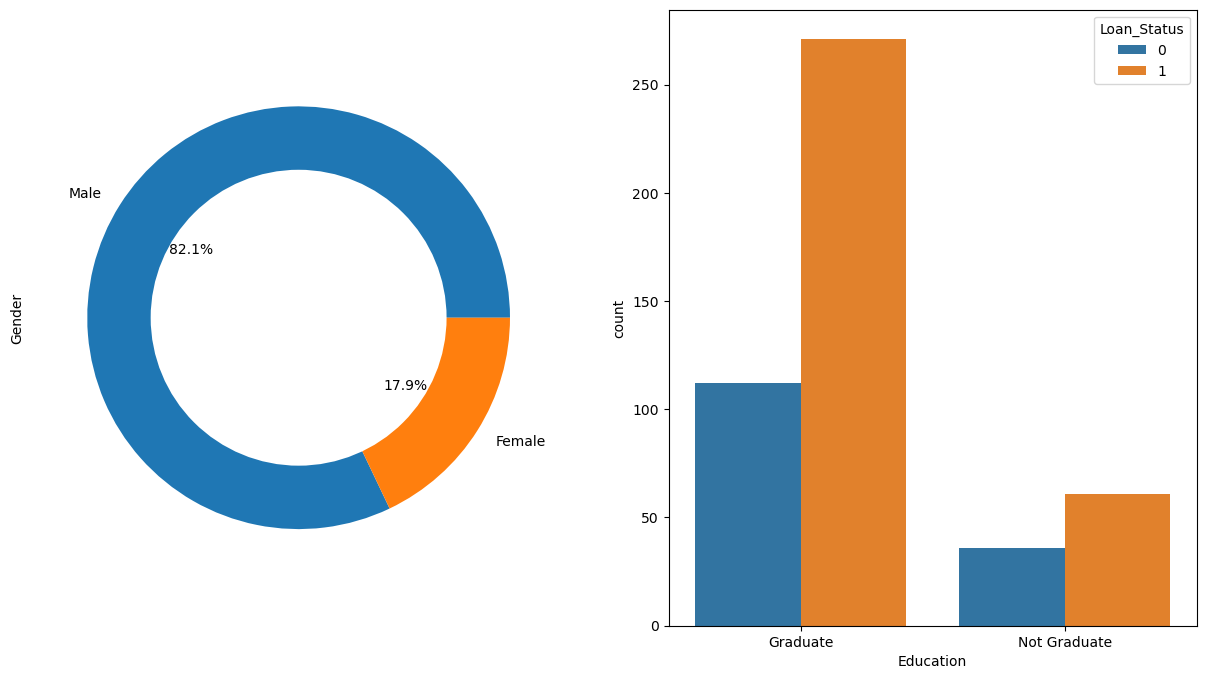

In [ ]:
#Gender vs Loan status

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)


There are more no. of male applicants than female applicants, almost 4 times.

<AxesSubplot:xlabel='Married', ylabel='count'>

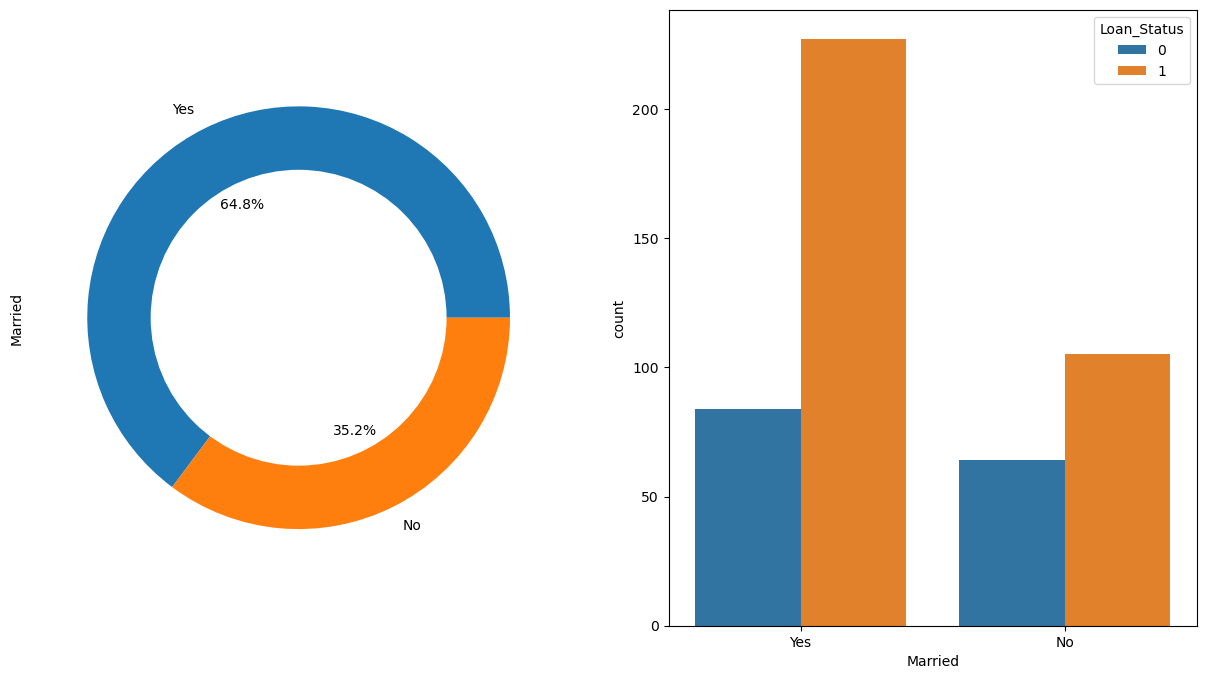

In [ ]:
# marital status and loan status

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Married'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

There are more no. of applicants who are married than the unmarried ones.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

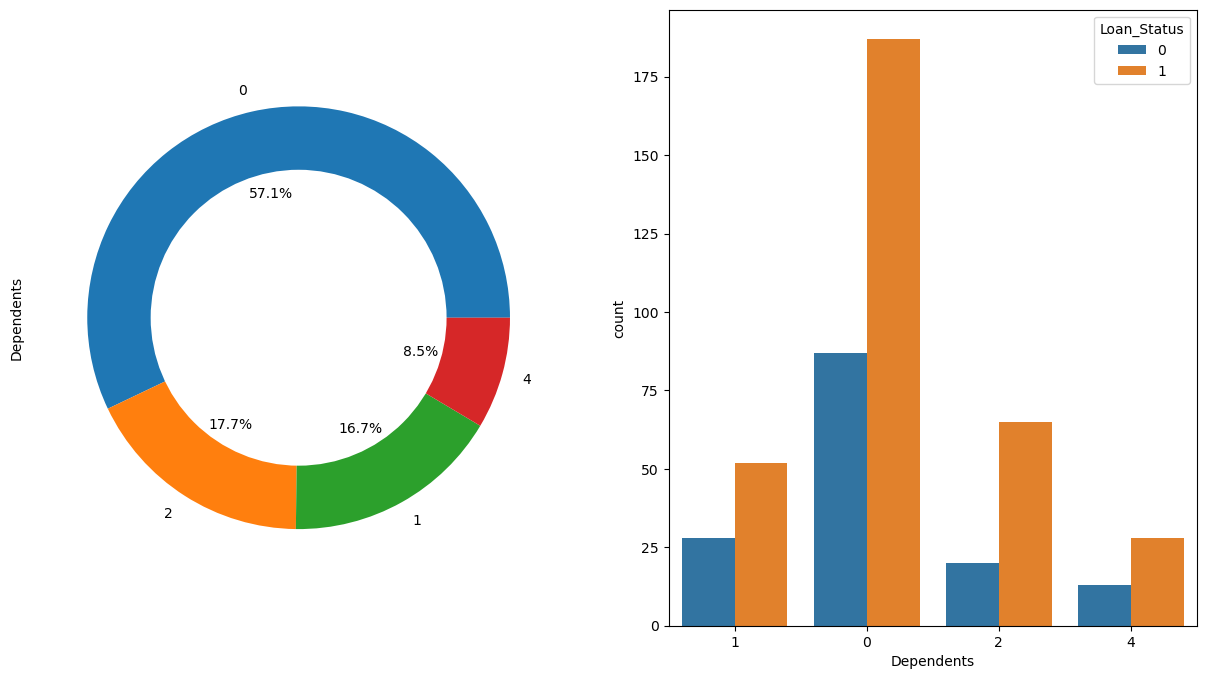

In [ ]:
#Dependents vs Loan status

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

Most loan applicants have 0 dependents, people who have 3 or more than 3 dependes are very few.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

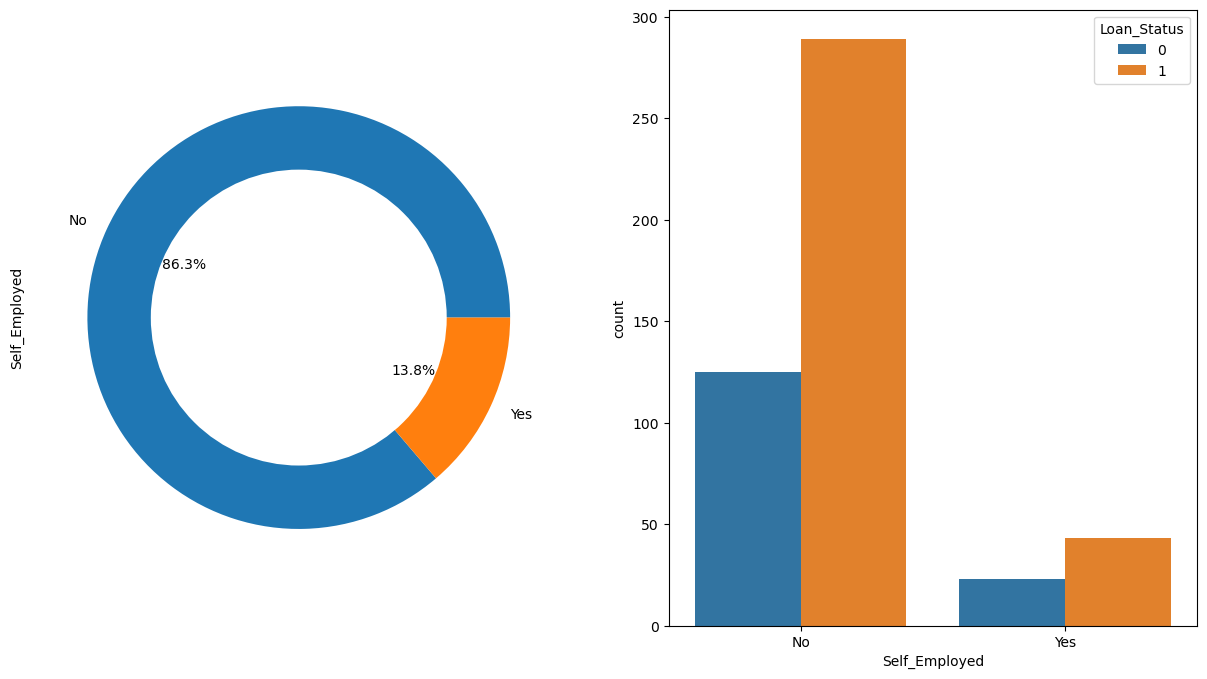

In [ ]:
#Self employed vs Loan status
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

Self Employed people seem to apply for loan lesser than who are not self employed or this could also be that there are less no. of peple who are self employed.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

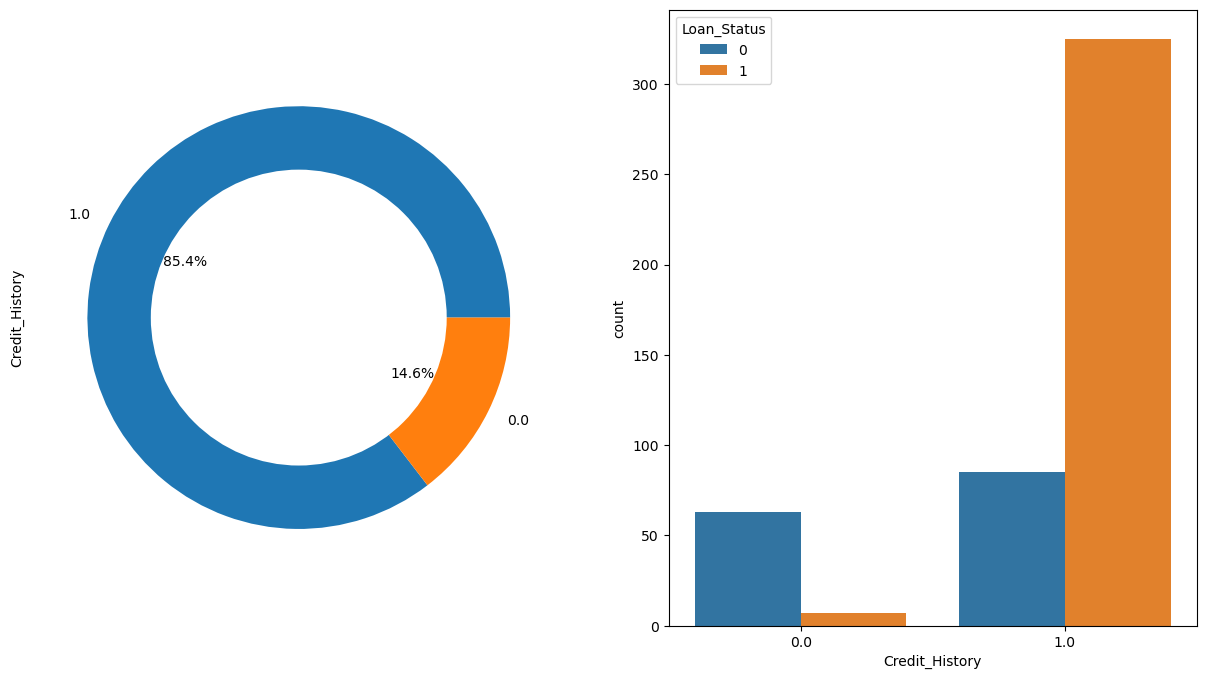

In [ ]:
#Credit History vs Loan status

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

Most of the applicants who apply for loan have a good credit history

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

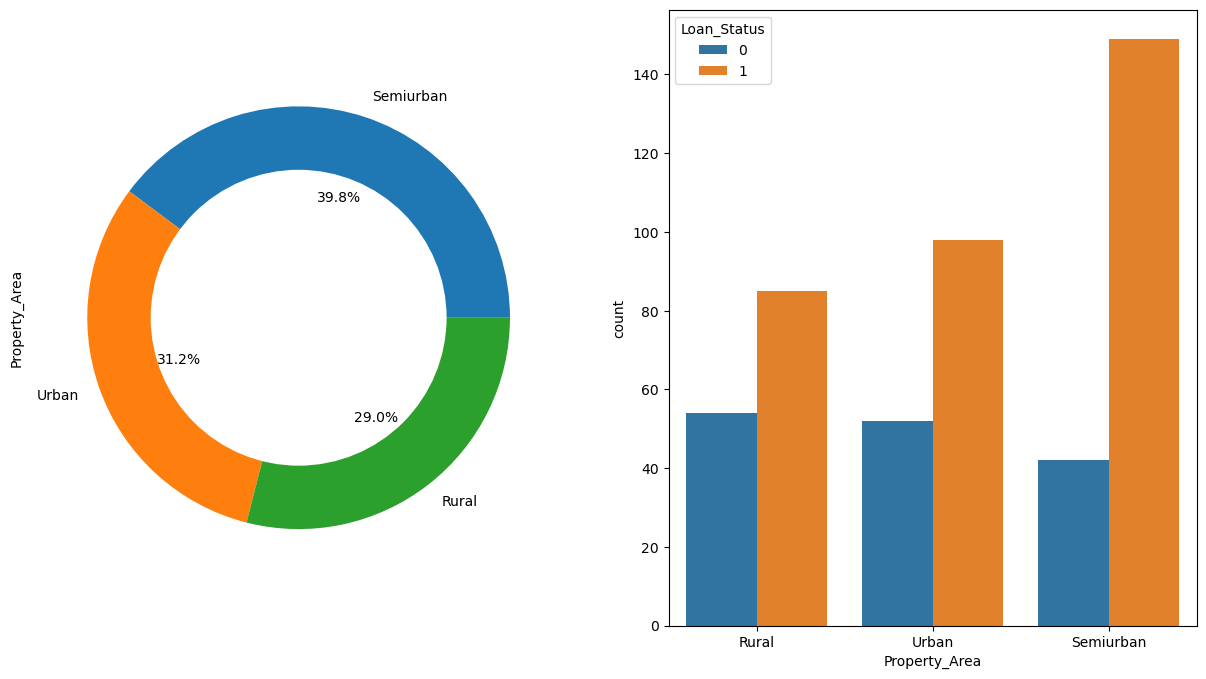

In [ ]:
# Loan status and loan status
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_dataset['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_dataset)

Most loan applicants live in semiurban area while the applicants from rural area are the least in no.

Minimum 150
Maximum 81000


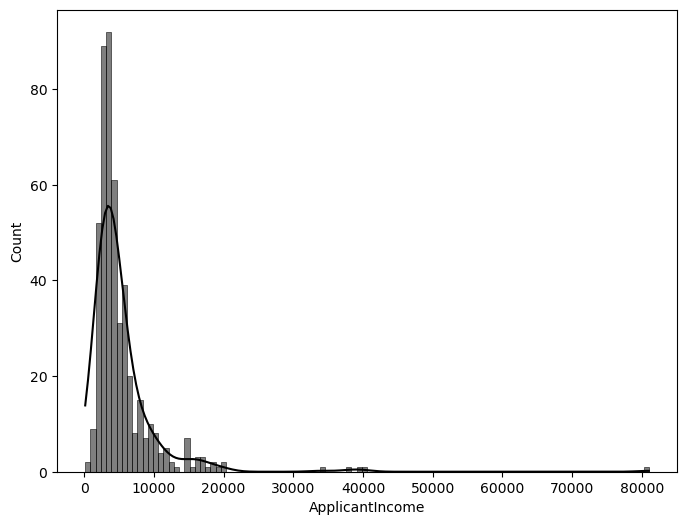

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(loan_dataset['ApplicantIncome'],kde=True,color='k')
print('Minimum',loan_dataset['ApplicantIncome'].min())
print('Maximum',loan_dataset['ApplicantIncome'].max())

Most of the loan applicants have their income in the range 1000 to 10000 while applicants having income as low as 150 and as high as 81000 also apply for loan. Data is highly skewed to the right.

Minimum 9.0
Maximum 600.0


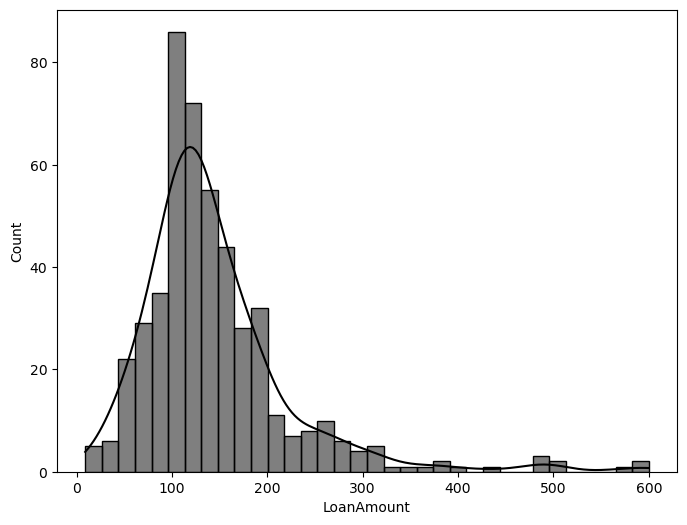

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(loan_dataset['LoanAmount'],kde=True,color='k')
print('Minimum',loan_dataset['LoanAmount'].min())
print('Maximum',loan_dataset['LoanAmount'].max())

Loan amount varies from 9 to 700. Most of the loan amount lie in 80 to 180. Data is skewed to the right side with mean greater than the median.

Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

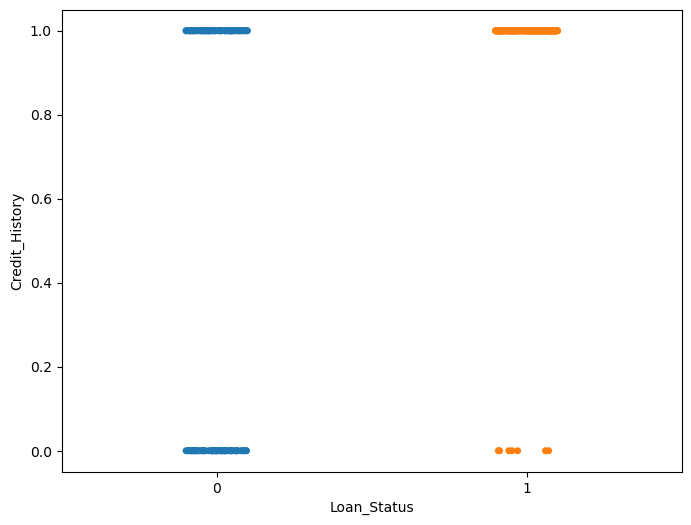

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Loan_Status',y='Credit_History',data=loan_dataset)

If a person have bad credit history, there are chances his loan will be rejected, whereas there are some cases where loan have been granted even after bad credit history. Also good credit history does not guarantee you a approval of loan alone.

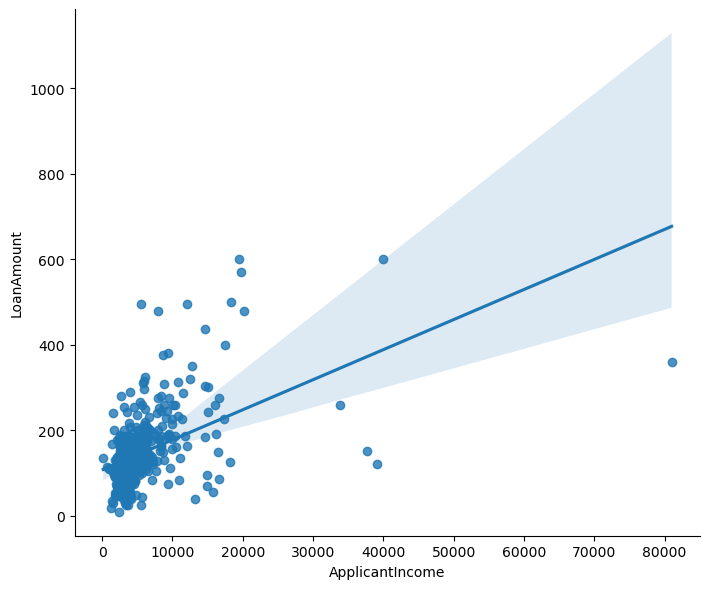

In [ ]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=loan_dataset,height=6, aspect=1.2)

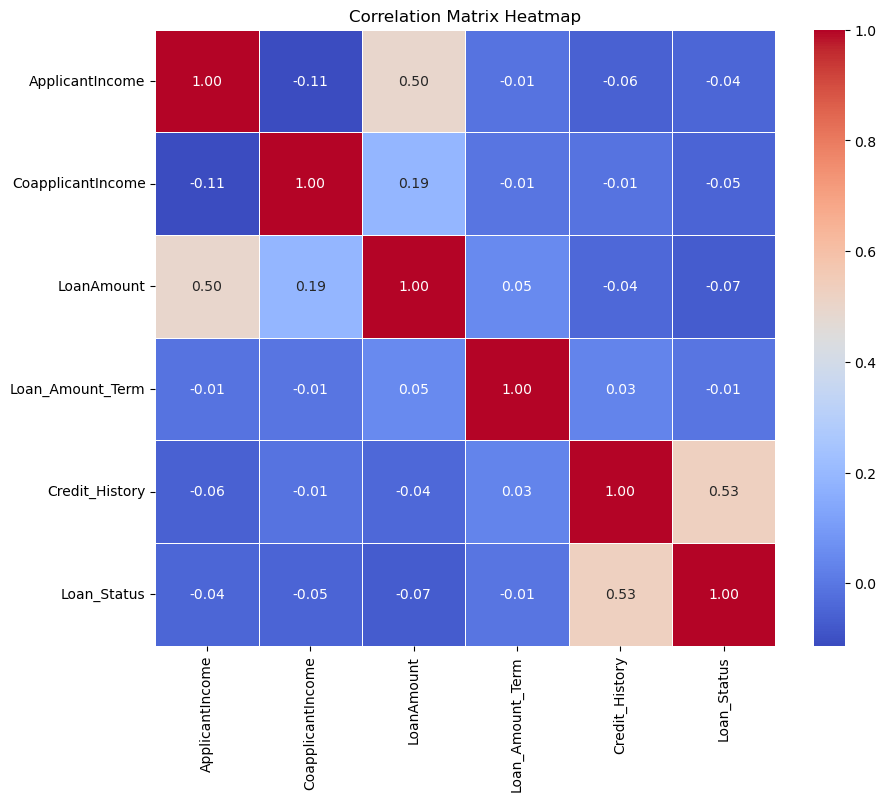

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing your dataset
correlation_matrix = loan_dataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


We see that the most correlated variables are Applicantincome - LoanAmount and Credit_History - Loan_Status.
LoanAmount is also correlated with Coapplicantincome

In [ ]:
np.corrcoef(loan_dataset['LoanAmount'], loan_dataset['ApplicantIncome'])

array([[1.        , 0.49530959],
       [0.49530959, 1.        ]])

correlation between loan amount and applicant income is 49.5%

In [ ]:
np.corrcoef(loan_dataset['Credit_History'], loan_dataset['Loan_Status'])

array([[1.        , 0.52938975],
       [0.52938975, 1.        ]])

correlation between Credit History and Loan status is 52.9%

Convert categorical columns to numerical values

In [ ]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0, 'Yes':1},'Property_Area':{'Rural':0, 'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# seperating the data and label

x = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

## Training the  Model

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=2)


In [ ]:
x.shape, x_test.shape, x_train.shape

((480, 11), (96, 11), (384, 11))


 *Support Vector Machine Model*

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(x_test)
print(metrics.accuracy_score(y_pred, y_test))

0.8125


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [ ]:
#training the support vector machine model
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#accuracy score on training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy

0.7786458333333334

In [ ]:
#accuracy score on testing data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.8125

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 16],
       [ 2, 64]], dtype=int64)

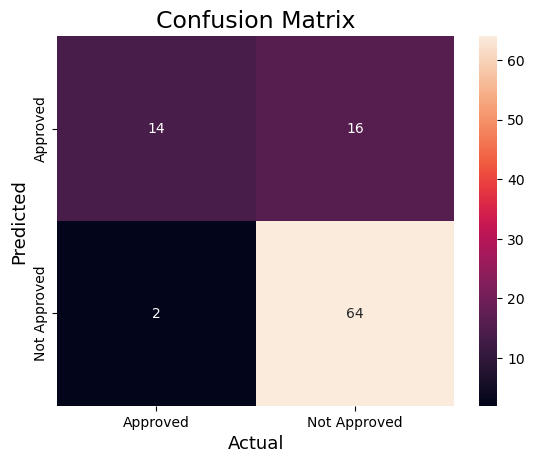

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.ylabel('Predicted',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_negatives = cm[0,0]

# Calculate precision, recall, and F1 score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)
Specificity = true_negatives / (true_negatives + true_positives)


print("Confusion Matrix\n",cm)

print("The Accuracy of the SVM is " ,metrics.accuracy_score(y_pred, y_test))
print("Precision:", precision)
print("Recall:", recall)
print("Specificity",Specificity)
print("F1 Score:", f1_score)

Confusion Matrix
 [[14 16]
 [ 2 64]]
The Accuracy of the SVM is  0.8125
Precision: 0.8
Recall: 0.9696969696969697
Specificity 0.1794871794871795
F1 Score: 0.8767123287671234
